# Final Q1

Stephanie Eordanidis

Final Exam Q1

College of Engineering & Computer Science, Syracuse University

CIS 700 Machine Learning and Security

Dr. Alsmadi Izzat

06/16/2021



## Purpose:
The purpose of this lab is to fullfil the requirements of the final exam's question 1

Using the eapoe.txt dataset from the course project, ensemble learning methods will be explored on this dataset. 

Data Related: 
First method explored is Stacking, with various classifiers applied, measuring accuracy against each classifier prediciton, and applying subsampling variants to the data to see the affects.

Settings Related:
Using the code from the date related portion, various settings and hyperparamters will be adjusted to see if we can improve the performance

## (Hard/Soft)ware:
**Google Colaboratory**		https://colab.research.google.com/

**GPU**                     Python 3 Google Compute Engine backend

**Github**                  https://github.com/eordanis/CIS-700-final

## Resources:
**Original Source:**

* [Stacking Source 1](https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-learning-9c66cb271674)
* [Stacking Source 2](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)
* [Stacking Source 3](https://www.kaggle.com/hdj0401/stacking-classifier-testing)

## Data:
The data for the selected project is setup as follows:
*   eapoe : 255 sentences
 *  eapoe : 25 sentences Compiled from various Edgar Allan Po Poems found on referenced poem sight  [1].
 
> **NOTE:** Original dataset was a text only .txt dataset. Merged the original test/training dataset into a .csv column. A new sentiment column was added, in which is the target, half of the data's sentiment column was populated line by line with positive, neutral, or negative pending rating of line, while other half remained empty as to use for test.

## Modifications:
 
 **Stacking**

 For stacking.py, code is based on both stacking sources indicated but heavily modified. Cleaned up file and added more classifiers to the py file run. Added arg params to specify data to use as well as if we are running with default hyperparameters or adjusted settings



## Setup:
Project was run and tested on google colab environment.

“Stephanie_Eordanidis_CIS700_Final_Q1”. This workspace was run using the hosted runtime environment. This document is the current document being read.

In order to run against provided code base, it was necessary to sync the colab workspace the github repository files as follows

```
!git clone https://$GITHUB_AUTH@github.com/eordanis/CIS-700-final/
```

Running this command from the first cell in the workbook syncs the drive to the github repo location of project location, as well as change to the necessary directory


In [ ]:
import shutil
# to prevent nesting problems, remove directory and its contents if exists
#if called to remove known existing, must restart runtime before cloning again
dir_path = '/content/CIS-700-final'
try:
    shutil.rmtree(dir_path)
except OSError as e:
    print("Error: %s : %s" % (dir_path, e.strerror))

In [ ]:
!git clone https://$GITHUB_AUTH@github.com/eordanis/CIS-700-final/
%cd CIS-700-final

Cloning into 'CIS-700-final'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 87 (delta 35), reused 75 (delta 23), pack-reused 0
Unpacking objects: 100% (87/87), done.
/content/CIS-700-final


## Code Process
Below is a high level description of the process flow for the project code:

> **NOTE:** Under test, we first run the ensemble stackign classifier first with standard settings, then run again with adjusted settings applied at all applicable steps in below process

1. Anaylyse Arguments

    a. If -d is provided, this indicates the dataset location

    b. If -a is provided, this indicates to apply settings changes to the ensemble run

2. Start recording the model time elapse

3. Using dataset location, define and prepare the training and test data, for text data, this means label encoding, test/training splitting, cleaning, and vectorization/feature extraction.

4. Then models are retrived and returned, we gather the 6 Independent Classifier modelsthat comprise the Stackinn classifier first, then the ensembled Stacking classifiers. For Stacking Classifier, we to set hyperparamters use_probas=True, average_probas=False, to use the real probabilities of the ensembled classifiers to adjust the Stacking classifier.

    a. When adjusted settings are applied, model hyperparameter settings are changed

5. After model retrieval, we begin evaluating the model metrics.

    a. We determine CV by the RepeatedKFold return

        1. When adjusted settings are applied, RepeatedKFold settings are adjusted
    
    b. We determine each given models cross-validation score and append to a csv

6. After csv is populated, we generate a data table and horizontal bar chart for results discussion

7. When both standard and adjusted settings runs are completed, we generate a visual comparision under results comparisions section.


## Data Related

For this category, Ensemble Classifier method of Stacking was selected. The purpose of applying Stacking is in order to increase prediction model accuracy. Cross validation is used to determine and improve model accuracy. For our purposes, our StackingClassifier also uses the probabiklity of stacked classifier models for even greater accuracy.

In [ ]:
!python3 -W ignore stacking.py -d 'data/eapoe.csv'


******************************************************************

	Stack Ensemble Classifier Example

******************************************************************

Beginning Classification Modeling...

Recording Time Elapse...

Accuracy	Variance (+/-)	Classifer

0.585		0.101		RandomForest  
0.641		0.089		KNeighbors  
0.623		0.118		LogisticRegression  
0.588		0.117		ExtraTrees  
0.539		0.114		DecisionTree  
0.544		0.108		AdaBoost  
0.637		0.117		Stacking  

******** Completed Classification Modeling ********

Time Elapsed: 32secs



In [ ]:
import visual as vis

vis.display_stacking_dataframe()

,Classifier,Accuracy,Variance
0,RandomForest,0.5854,0.1013
1,KNeighbors,0.6414,0.0895
2,LogisticRegression,0.6233,0.1180
3,ExtraTrees,0.5875,0.1173
4,DecisionTree,0.5394,0.1139
5,AdaBoost,0.5442,0.1078
6,Stacking,0.6371,0.1174


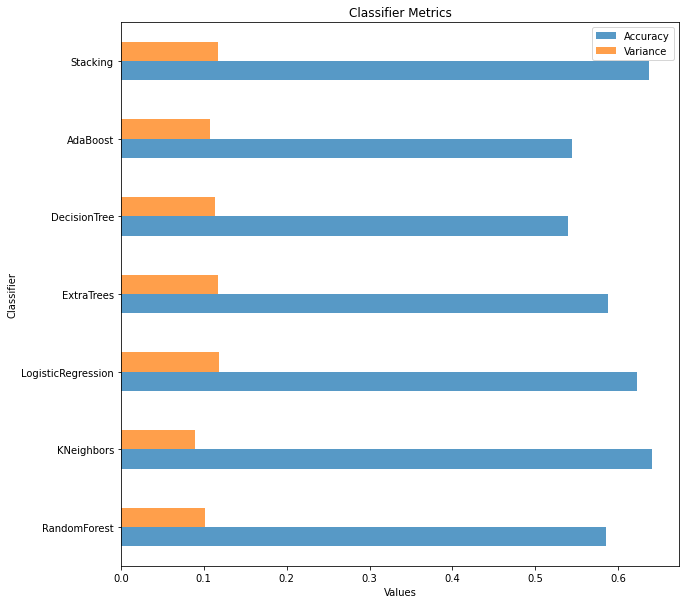

In [ ]:
vis.display_stacking_metrics()

### Results

As seen by above metric results, accuracies for the models are fairly consistent. However, ensemble stacking proves to be more accurate and less variant than majority of the singular layered classifiers applied. 

Upon examination of the above tables and charts, we have a true visual guage of performance. We see accuracy and variance values for the 6 classifiers that make up the Stacking classifier independently, then we see the same performance indicators for the Stacking classifier itself. 

We can infer from the above data values, that the Stacking classifier is found to be superior to all of its comprised independent classifiers, with the exception of the Logistic Regression classifier, in which is slightly more accuracy thatn the Stacking. However, if we look at variance, The Stacking classifier is the 3rd worse performance wise, along side Logistic Regression and Extra Trees. The close nature of Logistic Regression and Stacking Classifier can be assumed related to the fact that LogisticRegression was set as the meta learner for the StackClassifier.

## Settings Related:

Using the same code base as seen for the above section, settings and hyperparameter values are adjusted in the classifier models in order to build a better ensemble classifier. When comparing adjusted hyperparameters settings with default, we see many of the classifier models show greater accuracy and less variance with adjusted settings. This demonstrates that hyperparameter and setting tuning is an important factor in model performance and a valid application of ensemble learning.

In [ ]:
!python3 -W ignore stacking.py -d 'data/eapoe.csv' -a 'settings'


******************************************************************

	Stack Ensemble Classifier Example

******************************************************************

Beginning Classification Modeling...

Recording Time Elapse...

Running Classifiers With Adjusted Settings...

Accuracy	Variance (+/-)	Classifer

0.614		0.140		RandomForest  
0.642		0.124		KNeighbors  
0.672		0.112		LogisticRegression  
0.647		0.124		ExtraTrees  
0.550		0.114		DecisionTree  
0.537		0.117		AdaBoost  
0.663		0.131		Stacking  

******** Completed Classification Modeling ********

Time Elapsed: 02mins:16secs



In [ ]:
vis.display_stacking_dataframe(adjusted='true')

,Classifier,Accuracy,Variance
0,RandomForest,0.6144,0.1399
1,KNeighbors,0.6421,0.1237
2,LogisticRegression,0.6716,0.1119
3,ExtraTrees,0.6475,0.1236
4,DecisionTree,0.5500,0.1139
5,AdaBoost,0.5374,0.1166
6,Stacking,0.6627,0.1311


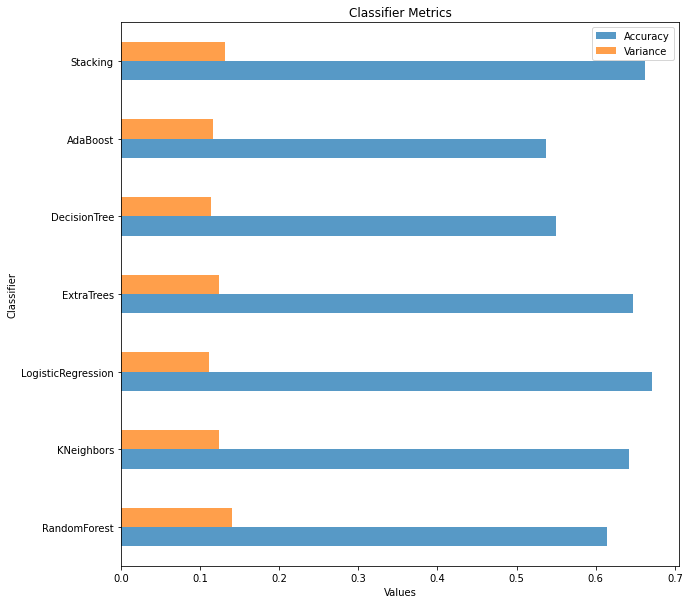

In [ ]:
vis.display_stacking_metrics(adjusted='true')

### Results

This run is with the Settings changed, but just as seen with the standard run, the above metric results demonstrate accuracies for the models are fairly consistent. Overall accuracies are higher than that of the standard run as well. However, ensemble stacking proves to be more accurate and less variant than majority of the singular layered classifiers applied.

As seen by above metric results, accuracies for the models are fairly consistent. However, ensemble stacking proves to be more accurate and less variant than majority of the singular layered classifiers applied. 

Upon examination of the above tables and charts, we have a true visual guage of performance. We see accuracy and variance values for the 6 classifiers that make up the Stacking classifier independently, then we see the same performance indicators for the Stacking classifier itself. 

We can infer from the above data values, that the Stacking classifier is found to be superior to all of its comprised independent classifiers, with the exception of the Logistic Regression classifier, in which is slightly more accuracy thatn the Stacking. However, if we look at variance, The Stacking classifier is the 2rd worse performance wise, along side RandomForest.

## Compare

We will now compare the various runs. 

First off, we will list the hyperparameters applied to standard ensemble stack run vs the ajusted hyperparameters run.

> **NOTE:** Table values below are indicated as such:

* *standard* vs *adjusted*
	* if no vs is shown, value is applied to both

* N/A if not applicable to classifier

|     Classifier   |random_state|n_estimators|n_neighbors|criterion|max_depth|      splitter   |min_samples_split|
|------------------|------------|------------|-----------|---------|---------|-----------------|-----------------|
|    RandomForest  |   0 vs 1	|  10 vs 15  |    N/A    |   N/A   |   N/A   |       N/A       |       N/A       |
|     KNeighbors   |   0 vs 1	|     N/A    |   2 vs 3  |   N/A   |   N/A   |       N/A       |       N/A       |
|LogisticRegression|   0 vs 1	|     N/A    |    N/A    |   N/A   |   N/A   |       N/A       |       N/A       |
|     ExtraTrees   |   0 vs 1	|   5 vs 8   |    N/A    |   N/A   |   N/A   |       N/A       |       N/A       |
|    DecisionTree  |   0 vs 1	|     N/A    |    N/A    |   gini  |    2    | best  vs random |      2 vs 3     |
|      AdaBoost    |   0 vs 1	| 100 vs 200 |    N/A    |   N/A   |   N/A   |       N/A       |       N/A       |

Again, it should be noted that for both runs, the Stacking classifer is run with:

* classifiers -> all 6 classifiers
* meta_classifier -> Logistic Regression
* use_probas=True
* average_probas=False

In [ ]:
vis.display_comparision_dataframe()

,Acc_Adjusted,Acc_Standard,Var_Adjusted,Var_Standard
Classifier,,,,
RandomForest,0.6144,0.5854,0.1399,0.1013
KNeighbors,0.6421,0.6414,0.1237,0.0895
LogisticRegression,0.6716,0.6233,0.1119,0.1180
ExtraTrees,0.6475,0.5875,0.1236,0.1173
DecisionTree,0.5500,0.5394,0.1139,0.1139
AdaBoost,0.5374,0.5442,0.1166,0.1078
Stacking,0.6627,0.6371,0.1311,0.1174


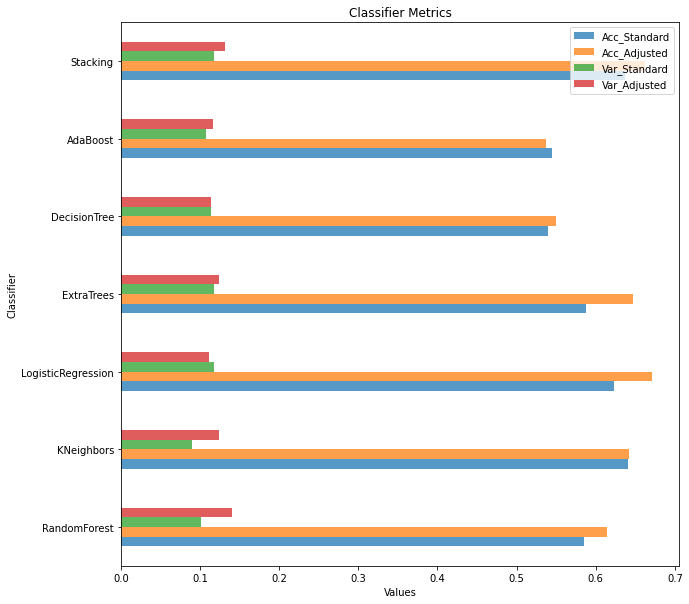

In [ ]:
vis.display_comparision_metrics()

### Comparision Results

When we examine the combined standard vs adjusted metrics, we see that although variance of adjusted metrics appear higher when compared to standard, the adjusted accuries overall are superior to that of standard with the exception of adaboost. More specifically, as we examine the metrics and charting, we can infer that the LogisticRegression and the Extra Trees Classifiers saw greater accuracies when run with settings manipulations vs runnign with standard settings. Futhermore it is important to note the difference of the stacked enseble classifier both standard and adjusted when compared with the non ensemble classifiers, as overall the ensemble learning functionallity indeed improve overall performance and accuracy comparitavely.

From this we can conclude that ensemble learning methods of various types, when applied in a concise and proper manner, can futher the accuracy and robustness of machine learning models, resulting in more quality application and predictions.



In [ ]:
#PDF/HTML conversion of notebook
!dpkg --configure -a
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
%cd /content/CIS-700-final/
!jupyter nbconvert --output-dir='results/' --to PDF "Stephanie_Eordanidis_CIS700_Final_Q1.ipynb"
!jupyter nbconvert --output-dir='results/' --to HTML "Stephanie_Eordanidis_CIS700_Final_Q1.ipynb"